# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Assignment 3

#### Yogendra Singh  &emsp;  214161014 <br><br> M Shanmukh Rao &emsp;   214161004

<br><br><b>1. Write the following function in python to generate n number of points
around the line $y = ax + b$.<br><br>
$$[y_{outlier}, y_{noisy},y_{actual}]=generateDataSet(a,b,x_{min},x_{max},n, \alpha,\sigma)$$<br><br>
where $x\in [x_{min}; x_{max}]$ , $\sigma$ is the standard deviation of additive white
noise and $\alpha$ is the fraction of outliers present in the data $(\alpha \in (0, 1))$.
The output of the function is obtained as follows<br><br>
    
$$y_{actual}(i) = a*x(i) + b$$<br>
$$y_{noisy}(i) = y_{actual}(i) + \sigma*N(0,1)$$<br>
$$y_{outlier} = outlierCorruption(y_{noisy},\alpha)$$

<b>Display the scatter plot of the dataset with the outliers.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

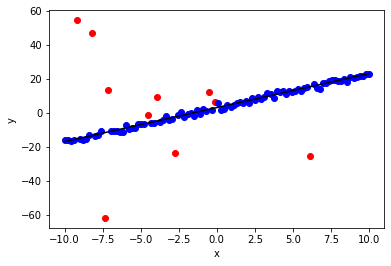

In [54]:
def outlierCorruption(ynoise,alpha):
    n=len(ynoise)
    n1=math.floor(n*alpha)
    ind=random.sample(range(0,n), n1)
    for i in range(n1):
        sign = [-1,1][random.randrange(2)]
        ynoise[ind[i]] = np.sign(ynoise[ind[i]]) * 20 + sign * random.randint(3,5) * ynoise[ind[i]]
    return ynoise,ind
        
        
    
def generateDataSet(a,b,xmin,xmax,n,alpha,sigma):
    x = np.linspace(xmin, xmax,n)
    y = a*x + b
    N=np.random.normal(0,1,n)
    ynoise = y + sigma*N
    ynoise,ind = outlierCorruption(ynoise,alpha)
    yout = ynoise[ind]
    xout = x[ind]
    yin = [i for i in ynoise if i not in ynoise[ind]]
    xin = [i for i in x if i not in x[ind]]
    return y,ynoise,yin,yout,x,xin,xout

a=2
b=3
xmin=-10
xmax=10
n=100
alpha=0.1
sigma=1
y,ynoise,yin,yout,x,xin,xout = generateDataSet(a,b,xmin,xmax,n,alpha,sigma)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'k')
plt.scatter(xout, yout, color='r')
plt.scatter(xin, yin, color='b')
plt.show()

<br><b>2. Perform Regression Diagnostics and display the line obtained in each
iteration. Please note that the outliers detected in each iteration should
be marked in red color. Experiment with different values of $\alpha$.<br><br>
$\alpha=0.1$

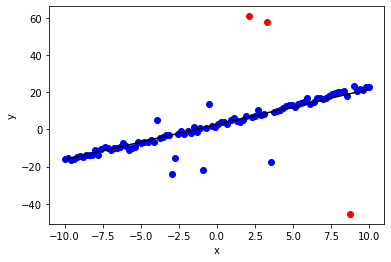

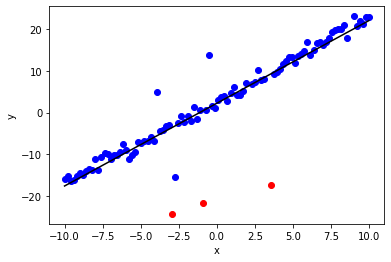

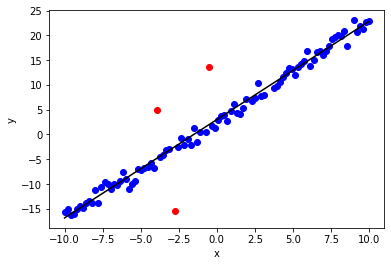

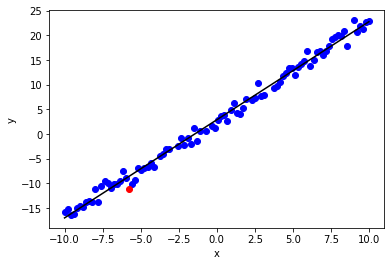

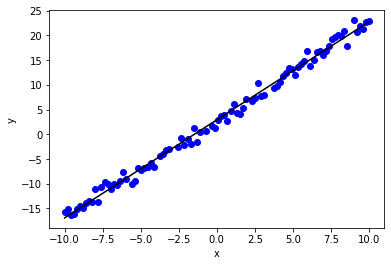

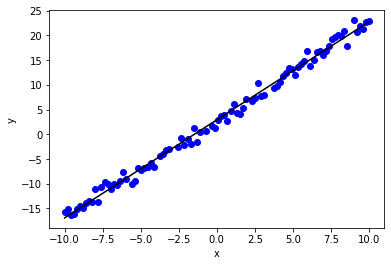

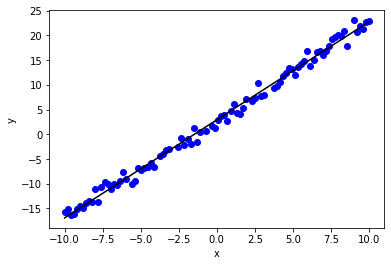

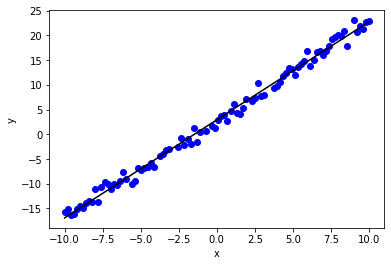

In [55]:
from sklearn.linear_model import LinearRegression
a=2
b=3
xmin=-10
xmax=10
n=100
alpha=0.1
sigma=1
y,ynoise,yin,yout,x,xin,xout=generateDataSet(a,b,xmin,xmax,n,alpha,sigma)
lmd=2.5
y=ynoise
k=50
count = 0


for i in range(k):
    x = np.array(x).reshape((-1, 1))
    y = np.array(y)
    model = LinearRegression()
    model.fit(x, y)
    b=model.intercept_
    a=model.coef_
    y=np.array(y).reshape((-1,1))
    e=y-(a*x+b)
    mu=np.mean(abs(e))
    var=np.var(abs(e))
    xk=[]
    yk=[]
    xo=[]
    yo=[]

    for i in range(len(e)):
        if abs(e[i])<(mu+lmd*math.sqrt(var)):
            xk.append(x[i])
            yk.append(y[i])
        else:
            xo.append(x[i])
            yo.append(y[i])
            
    if len(xo) == 0:
        count = count+1
        if count >= n/20:
            break
        
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,a*x+b,color='k')
    plt.scatter(xk,yk,color='b')
    plt.scatter(xo, yo, color='r')
    plt.show()
    x=xk
    y=yk
    

<b>Note: Here we are assuming alpha is not given, thus we are iterating
until continuously there are no outliers found<br><br>

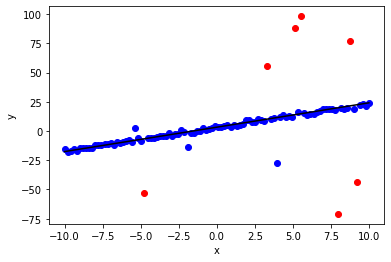

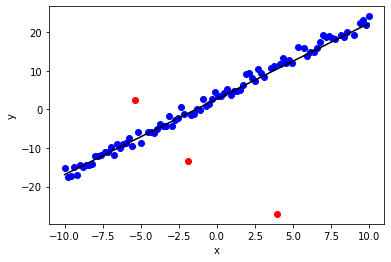

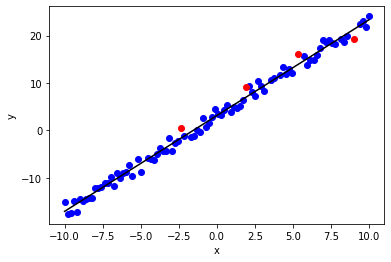

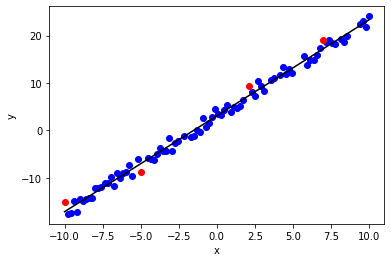

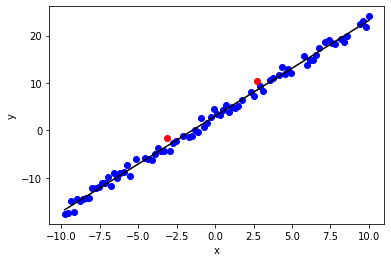

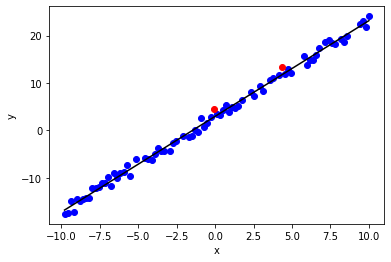

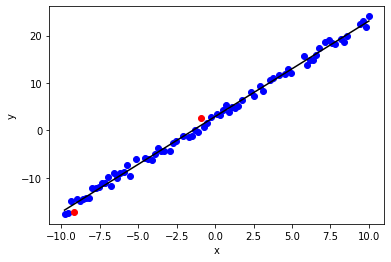

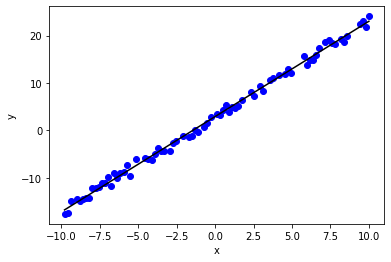

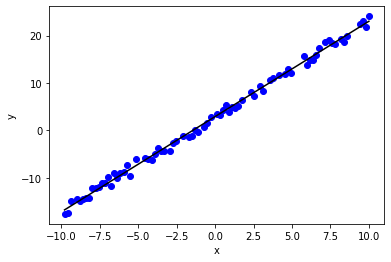

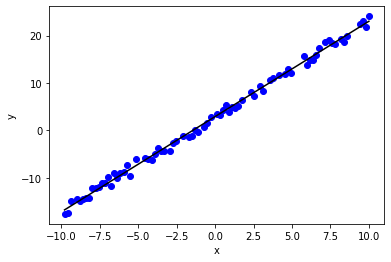

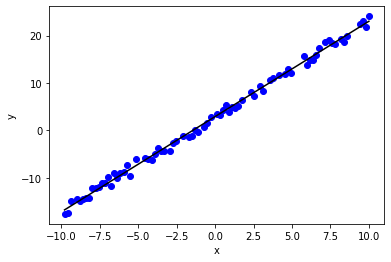

In [56]:
a=2
b=3
xmin=-10
xmax=10
n=100
alpha=0.1
sigma=1
y,ynoise,yin,yout,x,xin,xout=generateDataSet(a,b,xmin,xmax,n,alpha,sigma)
lmd = 2
y=ynoise
k=50
count = 0


for i in range(k):
    x = np.array(x).reshape((-1, 1))
    y = np.array(y)
    model = LinearRegression()
    model.fit(x, y)
    b=model.intercept_
    a=model.coef_
    y=np.array(y).reshape((-1,1))
    e=y-(a*x+b)
    mu=np.mean(abs(e))
    var=np.var(abs(e))
    xk=[]
    yk=[]
    xo=[]
    yo=[]

    for i in range(len(e)):
        if abs(e[i])<(mu+lmd*math.sqrt(var)):
            xk.append(x[i])
            yk.append(y[i])
        else:
            xo.append(x[i])
            yo.append(y[i])
            
    if len(xo) == 0:
        count = count+1
        if count >= n/20:
            break
        
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,a*x+b,color='k')
    plt.scatter(xk,yk,color='b')
    plt.scatter(xo, yo, color='r')
    plt.show()
    x=xk
    y=yk
    

<b>Note: By reducing lamda we are taking a strict step towards outliers.
It means we are okay if we loose some data points but there must not
be any outliers.If we want to increase severity towards outliers we can also increase
the number of continuous times we are getting 0 outliers.<br>

<br><br>$\alpha=0.25$

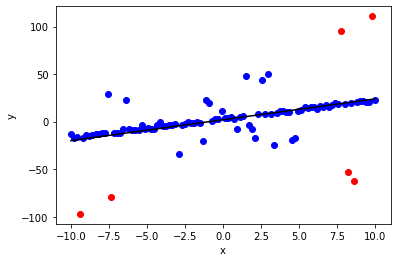

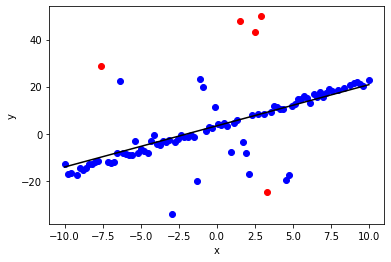

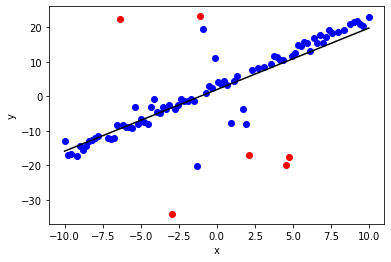

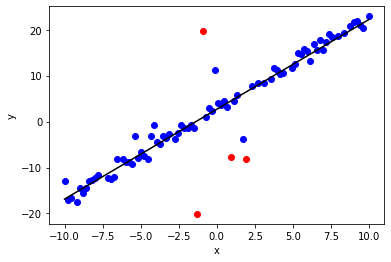

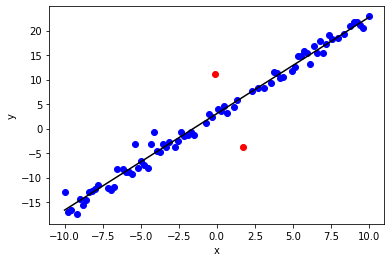

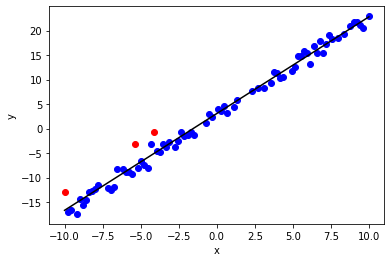

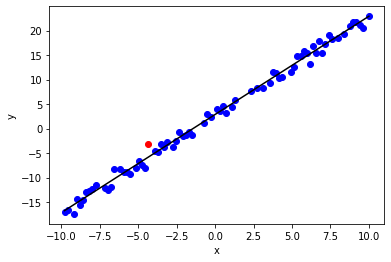

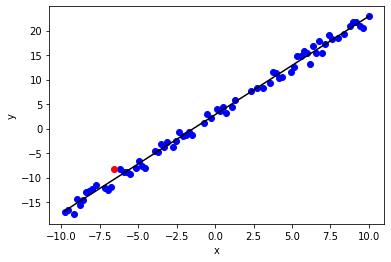

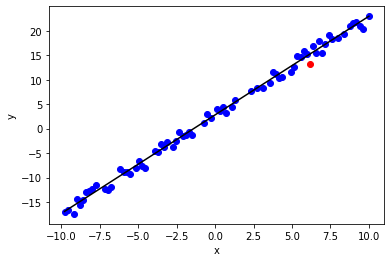

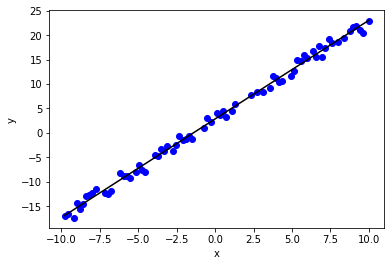

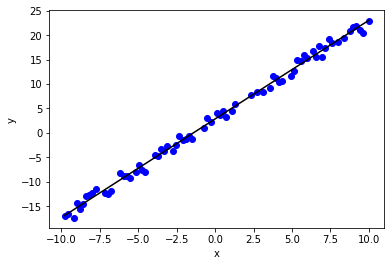

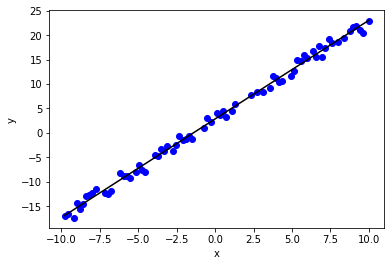

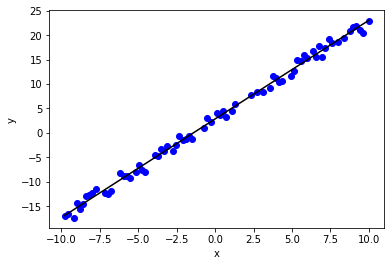

In [57]:
a=2
b=3
xmin=-10
xmax=10
n=100
alpha=0.25
sigma=1
y,ynoise,yin,yout,x,xin,xout=generateDataSet(a,b,xmin,xmax,n,alpha,sigma)
lmd=2.5
y=ynoise
k=50
count = 0


for i in range(k):
    x = np.array(x).reshape((-1, 1))
    y = np.array(y)
    model = LinearRegression()
    model.fit(x, y)
    b=model.intercept_
    a=model.coef_
    y=np.array(y).reshape((-1,1))
    e=y-(a*x+b)
    mu=np.mean(abs(e))
    var=np.var(abs(e))
    xk=[]
    yk=[]
    xo=[]
    yo=[]

    for i in range(len(e)):
        if abs(e[i])<(mu+lmd*math.sqrt(var)):
            xk.append(x[i])
            yk.append(y[i])
        else:
            xo.append(x[i])
            yo.append(y[i])
            
    if len(xo) == 0:
        count = count+1
        if count >= n/20:
            break
        
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,a*x+b,color='k')
    plt.scatter(xk,yk,color='b')
    plt.scatter(xo, yo, color='r')
    plt.show()
    x=xk
    y=yk

<br><br><b>3. Perform RANSAC on the above set of points and plot the output of
each trial.

iteration no. 0


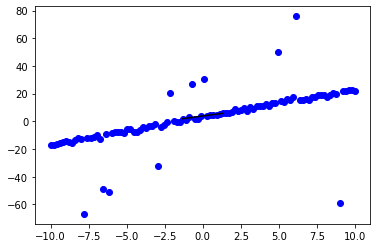

iteration no. 1


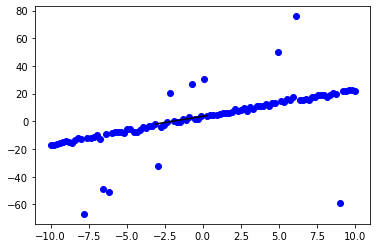

iteration no. 2


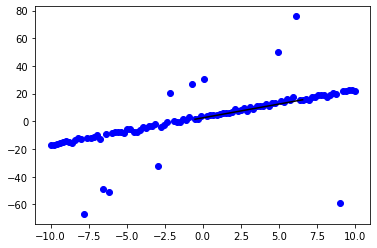

iteration no. 3


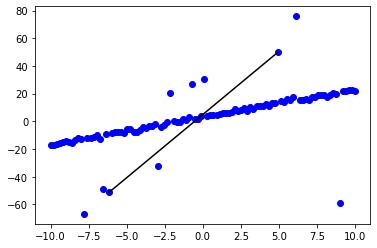

iteration no. 4


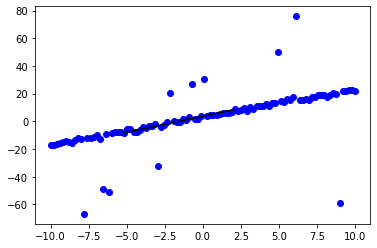

iteration no. 5


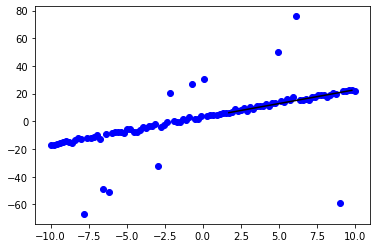

iteration no. 6


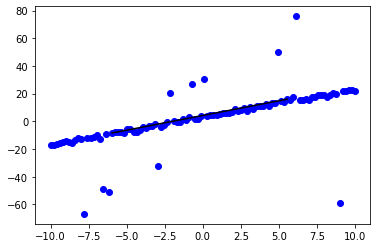

iteration no. 7


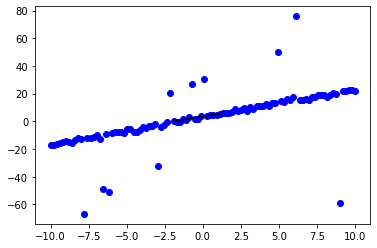

iteration no. 8


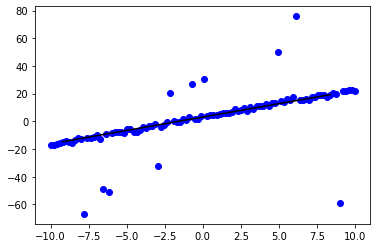

iteration no. 9


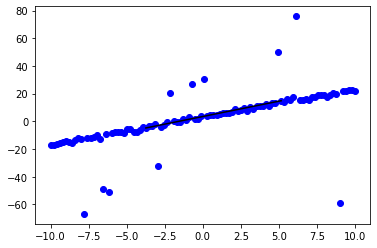

iteration no. 10


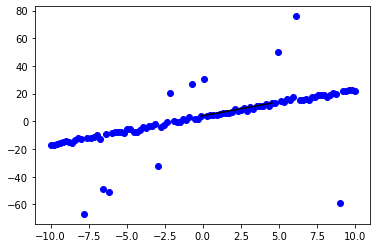

iteration no. 11


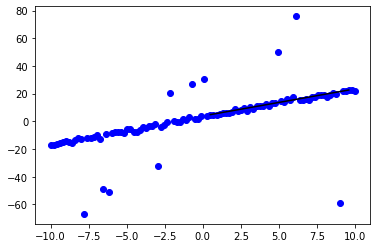

iteration no. 12


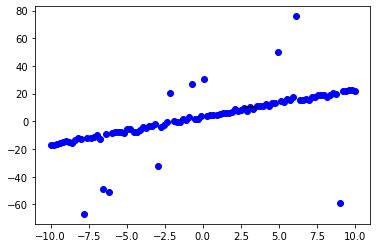

iteration no. 13


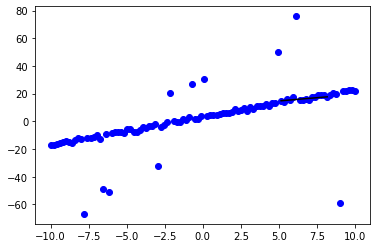

iteration no. 14


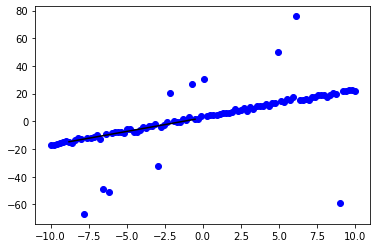

iteration no. 15


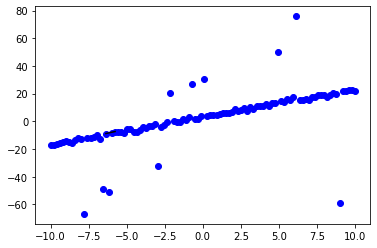

iteration no. 16


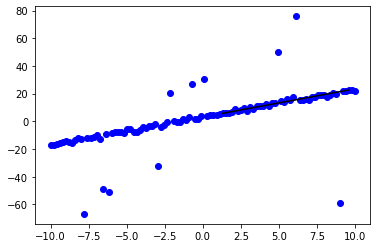

iteration no. 17


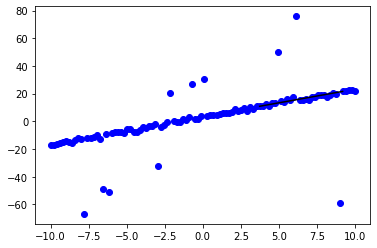

iteration no. 18


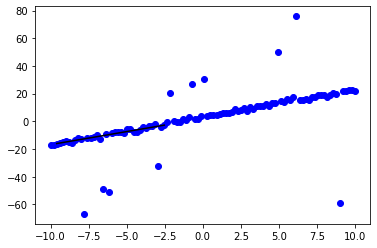

iteration no. 19


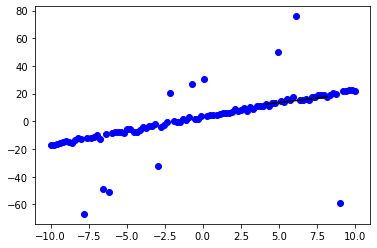

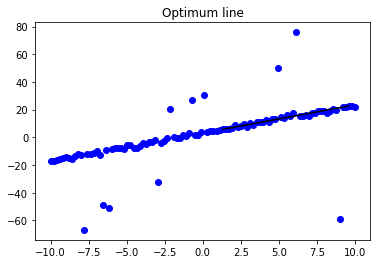

optimum solution is : y = 2.0329543187152965*x + 3.0987815085799544


In [58]:
from numpy.linalg import norm


def calc_err(p1,p2,x,ynoise):
    err = 0
    p1 = np.asarray(p1)
    p2 = np.asarray(p2)
    for i in range(len(x)):
        p3 = (x[i],ynoise[i])
        p3 = np.array(p3)
        d = abs((np.cross(p2-p1, p1-p3)) / norm(p2-p1))
        err = err + d
        
    return err







a=2
b=3
xmin=-10
xmax=10
n=100
alpha=0.1
sigma=1
error = 1000000
y,ynoise,yin,yout,x,xin,xout = generateDataSet(a,b,xmin,xmax,n,alpha,sigma)
Error = []

for i in range(20):
    ind = random.sample(range(0,n), 2)
    p1 = (x[ind[0]],ynoise[ind[0]])
    p2 = (x[ind[1]],ynoise[ind[1]])
    err = calc_err(p1,p2,x,ynoise)
    Error.append(err)
    plt.plot((p1[0],p2[0]),(p1[1],p2[1]), 'k')
    plt.scatter(x, ynoise, color='b')
    print(f"iteration no. {i}")
    plt.show()
    
    if Error[i] <= error:
        error = Error[i]
        points = (p1,p2)

    
#optimum line
p1 = points[0]
p2 = points[1]
plt.plot((p1[0],p2[0]),(p1[1],p2[1]), 'k')
plt.scatter(x, ynoise, color='b')
plt.title("Optimum line")
plt.show()


m = (p1[1]-p2[1]) / (p1[0]-p2[0])
c = p2[1] - (m*p2[0])

print(f"optimum solution is : y = {m}*x + {c}")